In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
sns.set_theme(style="whitegrid")

In [37]:
import os
os.getcwd()

'C:\\Users\\MichaelTiernan\\Flatiron\\Predicting_Baseball'

In [22]:
df = pd.read_pickle('data/df_teams.pkl')
df.head(10)

W    R    AB     H   2B  3B   HR     BB      SO     SB  \
yearID franchID                                                            
2000   ANA       82  864  5628  1574  309  34  236  608.0  1024.0   93.0   
       ARI       85  792  5527  1466  282  44  179  535.0   975.0   97.0   
       ATL       95  810  5489  1490  274  26  179  595.0  1010.0  148.0   
       BAL       74  794  5549  1508  310  22  184  558.0   900.0  126.0   
       BOS       85  792  5630  1503  316  32  167  611.0  1019.0   43.0   
       CHW       95  978  5646  1615  325  33  216  591.0   960.0  119.0   
       CHC       65  764  5577  1426  272  23  183  632.0  1120.0   93.0   
       CIN       85  825  5635  1545  302  36  200  559.0   995.0  100.0   
       CLE       90  950  5683  1639  310  30  221  685.0  1057.0  113.0   
       COL       82  968  5660  1664  320  53  161  601.0   907.0  131.0   

                   SF   RA   ER   ERA  CG  SHO  SV    HA  HRA  BBA   SOA    E  \
yearID franchID                                                                 
2000   ANA       43.0  869  805  5.00   5    3  46  1534  228  662   846  134   
       ARI       58.0  754  698  4.35  16    8  38  1441  190  500  1220  107   
       ATL       45.0  714  648  4.05  13    9  53  1428  165  484  1093  129   
       BAL       54.0  913  855  5.37  14    6  33  1547  202  665  1017  116   
       BOS       48.0  745  683  4.23   7   12  46  1433  173  498  1121  109   
       CHW       61.0  839  751  4.66   5    7  43  1509  195  614  1037  133   
       CHC       45.0  904  849  5.25  10    5  39  1505  231  658  1143  100   
       CIN       58.0  765  700  4.33   8    7  42  1446  190  659  1015  111   
       CLE       52.0  816  775  4.84   6    5  34  1511  173  666  1213   72   
       COL       75.0  897  835  5.26   7    2  33  1568  221  588  1001   94   

                  DP     FP  BPF  PPF  DivWin_Y  WCWin_Y  LgWin_Y  WSWin_Y  \
yearID franchID                                                              
2000   ANA       182  0.978  102  103         0        0        0        0   
       ARI       138  0.982  105  103         0        0        0        0   
       ATL       138  0.979  101   99         1        0        0        0   
       BAL       151  0.981   95   96         0        0        0        0   
       BOS       120  0.982  104  103         0        0        0        0   
       CHW       190  0.978  102  102         1        0        0        0   
       CHC       139  0.983   97   98         0        0        0        0   
       CIN       156  0.982  102  102         0        0        0        0   
       CLE       147  0.988  101  100         0        0        0        0   
       COL       176  0.985  125  125         0        0        0        0   

                 run_diff        ba  
yearID franchID                      
2000   ANA             -5  0.279673  
       ARI             38  0.265243  
       ATL             96  0.271452  
       BAL           -119  0.271761  
       BOS             47  0.266963  
       CHW            139  0.286043  
       CHC           -140  0.255693  
       CIN             60  0.274179  
       CLE            134  0.288404  
       COL             71  0.293993

In [24]:
df.reset_index(inplace=True)

In [25]:
df.describe()

,yearID,W,R,AB,H,2B,3B,HR,BB,SO,SB,SF,RA,ER,ERA,CG,SHO,SV,HA,HRA,BBA,SOA,E,DP,FP,BPF,PPF,DivWin_Y,WCWin_Y,LgWin_Y,WSWin_Y,run_diff,ba
count,600.000000,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,2009.500000,80.97000,740.668333,5539.850000,1437.898333,287.165000,29.661667,173.465000,522.043333,1164.465000,92.008333,43.686667,740.668333,681.950000,4.248000,4.633333,9.38000,40.813333,1437.898333,173.465000,522.043333,1164.465000,100.380000,147.558333,0.983415,100.148333,100.145000,0.200000,0.093333,0.066667,0.033333,0.000000,0.259439
std,5.771093,11.78646,83.211830,77.610802,82.657537,27.724818,8.922437,36.866208,70.176559,162.150589,30.065065,8.594859,88.933948,82.619231,0.534891,3.334780,3.90611,7.280121,91.861702,29.337176,65.085649,160.036991,16.311828,18.099703,0.002640,5.297462,5.213054,0.400334,0.291142,0.249652,0.179655,111.107116,0.012156
min,2000.000000,43.00000,513.000000,5294.000000,1199.000000,201.000000,5.000000,91.000000,363.000000,805.000000,19.000000,24.000000,525.000000,478.000000,2.940000,0.000000,1.00000,23.000000,1125.000000,96.000000,348.000000,764.000000,54.000000,95.000000,0.976000,88.000000,88.000000,0.000000,0.000000,0.000000,0.000000,-337.000000,0.226483
25%,2004.750000,72.00000,684.000000,5486.000000,1376.750000,269.000000,23.000000,148.000000,471.000000,1043.000000,69.000000,37.750000,676.750000,621.750000,3.860000,2.000000,7.00000,36.000000,1373.000000,153.000000,477.000000,1046.750000,88.750000,135.000000,0.982000,97.000000,97.000000,0.000000,0.000000,0.000000,0.000000,-87.000000,0.250249
50%,2009.500000,81.00000,735.000000,5538.000000,1435.000000,286.000000,29.000000,170.000000,521.000000,1147.500000,89.000000,43.000000,733.000000,677.000000,4.205000,4.000000,9.00000,41.000000,1439.000000,171.000000,520.500000,1153.000000,100.000000,147.000000,0.983000,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.259377
75%,2014.250000,90.00000,795.250000,5590.500000,1495.000000,304.000000,35.000000,199.000000,566.250000,1276.250000,112.000000,49.000000,804.000000,737.500000,4.602500,7.000000,12.00000,46.000000,1502.000000,191.000000,566.000000,1261.250000,110.000000,160.000000,0.985000,103.000000,103.000000,0.000000,0.000000,0.000000,0.000000,81.250000,0.267797
max,2019.000000,116.00000,978.000000,5770.000000,1667.000000,376.000000,61.000000,307.000000,775.000000,1595.000000,200.000000,75.000000,981.000000,913.000000,5.710000,18.000000,23.00000,66.000000,1683.000000,305.000000,728.000000,1687.000000,145.000000,204.000000,0.991000,125.000000,125.000000,1.000000,1.000000,1.000000,1.000000,300.000000,0.293993


In [30]:
wins_df = df.groupby(['franchID'])['W'].mean()

In [31]:
wins_df = pd.DataFrame(wins_df).sort_values('W', ascending=False)
wins_df

,W
franchID,
NYY,94.30
STL,90.60
BOS,89.60
LAD,89.05
ATL,86.75
OAK,86.45
ANA,86.10
SFG,83.80
CLE,83.55


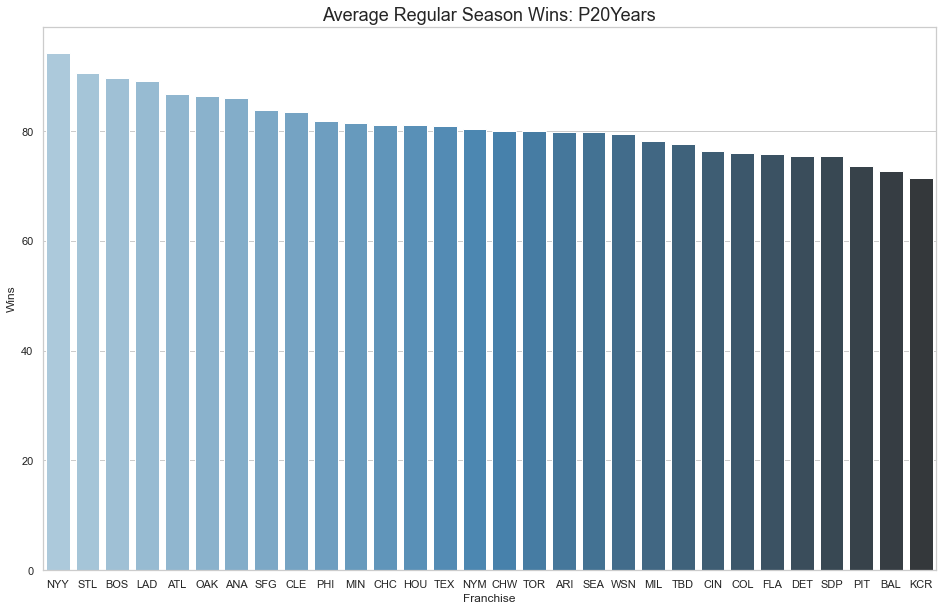

In [32]:
fig,ax = plt.subplots(figsize=(16,10))
ax = sns.barplot(x=wins_df.index, y='W', data=wins_df, palette='Blues_d')
ax.set_title("Average Regular Season Wins: P20Years", fontsize=18)
ax.set(xlabel='Franchise', ylabel='Wins')
plt.show()

# What about past 5 years?

In [6]:
# filter db to P5Years, 2015 - 2019
df_p5y = df.loc[(df['yearID']>2014)]
df_p5y

,yearID,franchID,W,R,AB,H,2B,3B,HR,BB,SO,SB,SF,RA,ER,ERA,CG,SHO,SV,HA,HRA,BBA,SOA,E,DP,FP,BPF,PPF,DivWin_Y,WCWin_Y,LgWin_Y,WSWin_Y,run_diff,ba,linedrivepercent,xobp,xwoba,vegas_win_total
0,2017,STL,83,761,5470,1402,284,28,196,593.0,1348.0,81.0,44.0,705,646,4.01,3,12,43,1393,183,493,1351,94,164,0.984,98,98,0,0,0,0,56,0.256307,25.8,0.330,0.326,86.0
1,2015,MIL,68,655,5480,1378,274,34,145,412.0,1299.0,84.0,34.0,737,682,4.28,1,7,40,1432,176,517,1260,116,164,0.981,101,101,0,0,0,0,-82,0.251460,27.0,0.290,0.289,78.5
2,2017,ARI,93,812,5525,1405,314,39,220,578.0,1456.0,103.0,27.0,659,586,3.66,2,11,43,1309,171,516,1482,108,140,0.982,110,110,0,1,0,0,153,0.254299,25.5,0.323,0.319,77.5
3,2019,ANA,72,769,5542,1368,268,21,220,586.0,1276.0,65.0,42.0,868,820,5.12,0,2,32,1417,267,576,1404,92,118,0.984,98,98,0,0,0,0,-99,0.246842,25.2,0.327,0.321,83.5
4,2017,ANA,80,710,5415,1314,251,14,186,523.0,1198.0,136.0,46.0,709,672,4.20,1,10,43,1373,224,470,1312,80,135,0.986,96,96,0,0,0,0,1,0.242659,23.4,0.318,0.312,79.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2015,SDP,74,650,5457,1324,260,36,148,426.0,1327.0,82.0,42.0,731,655,4.09,1,6,41,1371,171,516,1393,92,138,0.985,98,97,0,0,0,0,-81,0.242624,25.9,0.286,0.285,84.5
146,2016,PIT,78,729,5542,1426,277,32,153,561.0,1334.0,110.0,36.0,758,679,4.21,5,5,51,1490,180,533,1232,111,172,0.982,100,101,0,0,0,0,-29,0.257308,26.0,0.313,0.301,86.0
147,2016,WSN,95,763,5490,1403,268,29,203,536.0,1252.0,121.0,63.0,612,570,3.51,1,12,46,1272,155,468,1476,73,142,0.988,100,98,1,0,0,0,151,0.255556,26.1,0.313,0.310,88.0
148,2017,DET,64,735,5556,1435,289,35,187,503.0,1313.0,65.0,27.0,894,846,5.36,2,4,32,1587,218,538,1202,84,146,0.985,103,104,0,0,0,0,-159,0.258279,27.7,0.329,0.332,82.5


In [33]:
df_p5y_grouped = df_p5y.groupby(['franchID'])['W'].mean()

In [34]:
df_p5y_grouped = pd.DataFrame(df_p5y_grouped).sort_values('W', ascending=False)
df_p5y_grouped

,W
franchID,
LAD,97.0
HOU,96.2
CHC,94.2
NYY,93.0
CLE,92.2
BOS,91.2
WSN,90.0
STL,89.6
TBD,82.8


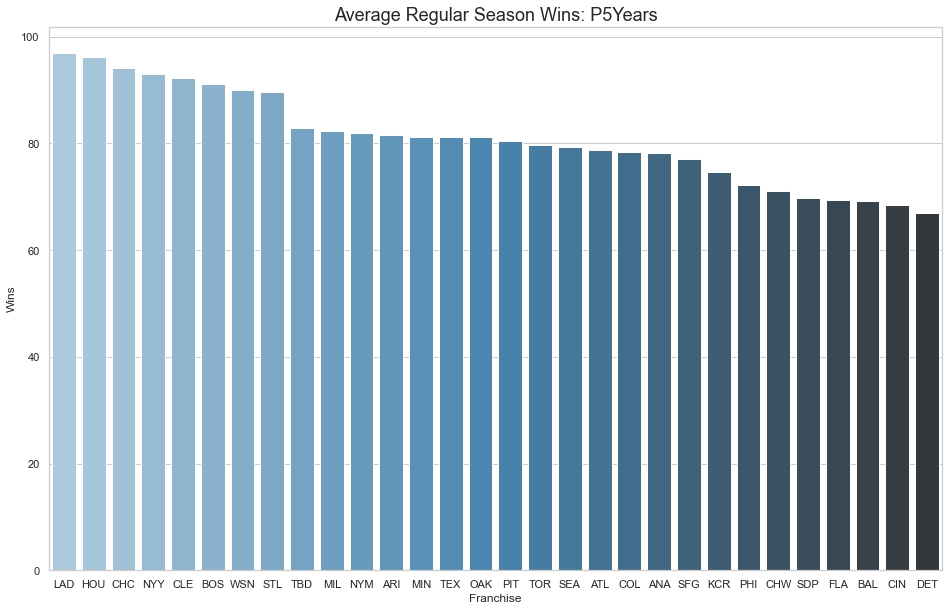

In [35]:
# P5Years
fig,ax = plt.subplots(figsize=(16,10))
ax = sns.barplot(x=df_p5y_grouped.index, y='W', data=df_p5y_grouped, palette='Blues_d')
ax.set_title("Average Regular Season Wins: P5Years", fontsize=18)
ax.set(xlabel='Franchise', ylabel='Wins')
plt.show()

In [10]:
df.describe()

,yearID,W,R,AB,H,2B,3B,HR,BB,SO,SB,SF,RA,ER,ERA,CG,SHO,SV,HA,HRA,BBA,SOA,E,DP,FP,BPF,PPF,DivWin_Y,WCWin_Y,LgWin_Y,WSWin_Y,run_diff,ba,linedrivepercent,xobp,xwoba,vegas_win_total
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.00000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.00000,150.000000
mean,2017.000000,80.973333,733.800000,5524.660000,1397.693333,277.920000,28.260000,193.233333,510.473333,1337.080000,82.153333,39.993333,733.800000,678.793333,4.227667,2.220000,9.706667,41.140000,1397.693333,193.233333,510.473333,1337.080000,94.480000,141.466667,0.984160,100.100000,100.033333,0.20000,0.133333,0.066667,0.033333,0.000000,0.252916,25.481333,0.312853,0.31086,81.230000
std,1.418951,12.675054,76.678532,71.727376,67.263475,25.641964,9.395437,38.930573,67.462910,126.072075,27.325219,7.515083,88.432585,82.542509,0.532812,2.163982,3.796054,7.530725,90.749448,31.210353,59.398969,134.212919,14.837247,18.922188,0.002425,5.663672,5.514370,0.40134,0.341073,0.250279,0.180107,125.170488,0.009899,1.265727,0.011798,0.01301,8.031948
min,2015.000000,47.000000,573.000000,5330.000000,1251.000000,222.000000,5.000000,100.000000,375.000000,973.000000,19.000000,26.000000,525.000000,478.000000,2.940000,0.000000,2.000000,25.000000,1125.000000,110.000000,364.000000,1046.000000,63.000000,95.000000,0.978000,89.000000,89.000000,0.00000,0.000000,0.000000,0.000000,-333.000000,0.233570,22.400000,0.284000,0.28300,59.000000
25%,2016.000000,71.000000,680.500000,5478.250000,1349.250000,259.250000,21.000000,165.250000,460.250000,1253.500000,63.000000,35.000000,670.500000,614.000000,3.802500,1.000000,7.000000,36.000000,1340.250000,174.000000,474.000000,1233.250000,85.000000,129.250000,0.983000,96.250000,97.000000,0.00000,0.000000,0.000000,0.000000,-97.500000,0.245868,24.700000,0.306000,0.30200,75.750000
50%,2017.000000,81.000000,729.000000,5520.500000,1392.000000,277.000000,28.000000,193.500000,512.000000,1331.500000,78.000000,39.500000,723.000000,669.500000,4.180000,2.000000,9.000000,41.000000,1399.500000,189.500000,506.000000,1332.500000,94.000000,141.000000,0.984000,99.000000,99.000000,0.00000,0.000000,0.000000,0.000000,-4.500000,0.252226,25.300000,0.313000,0.31000,81.500000
75%,2018.000000,91.000000,773.250000,5566.500000,1441.500000,292.000000,33.750000,220.000000,561.750000,1424.750000,98.000000,44.000000,795.500000,735.750000,4.607500,3.000000,12.000000,46.000000,1455.250000,213.750000,548.750000,1420.000000,102.750000,154.750000,0.986000,103.000000,103.000000,0.00000,0.000000,0.000000,0.000000,88.500000,0.258923,26.175000,0.320750,0.31975,86.000000
max,2019.000000,108.000000,943.000000,5770.000000,1598.000000,355.000000,56.000000,307.000000,656.000000,1595.000000,181.000000,63.000000,981.000000,897.000000,5.590000,11.000000,21.000000,62.000000,1617.000000,305.000000,653.000000,1687.000000,136.000000,190.000000,0.989000,119.000000,118.000000,1.00000,1.000000,1.000000,1.000000,280.000000,0.281834,29.300000,0.337000,0.34500,97.500000


In [40]:
mets = df.loc[df['franchID']=='NYM']
mets.head()

,yearID,franchID,W,R,AB,H,2B,3B,HR,BB,SO,SB,SF,RA,ER,ERA,CG,SHO,SV,HA,HRA,BBA,SOA,E,DP,FP,BPF,PPF,DivWin_Y,WCWin_Y,LgWin_Y,WSWin_Y,run_diff,ba
19,2000,NYM,94,807,5486,1445,281,20,198,675.0,1037.0,66.0,51.0,738,670,4.16,8,10,49,1398,164,574,1164,118,121,0.980,96,96,0,1,1,0,69,0.263398
49,2001,NYM,82,642,5459,1361,273,18,147,545.0,1062.0,66.0,35.0,713,654,4.07,6,14,48,1418,186,438,1191,101,132,0.983,96,96,0,0,0,0,-71,0.249313
79,2002,NYM,75,690,5496,1409,238,22,160,486.0,1044.0,87.0,30.0,703,624,3.89,9,10,36,1408,163,543,1107,144,138,0.976,97,97,0,0,0,0,-13,0.256368
109,2003,NYM,66,642,5341,1317,262,24,124,489.0,1035.0,70.0,45.0,754,704,4.48,3,10,38,1497,168,576,907,118,158,0.980,97,98,0,0,0,0,-112,0.246583
139,2004,NYM,71,684,5532,1376,289,20,185,512.0,1159.0,107.0,34.0,731,658,4.09,2,6,31,1452,156,592,977,137,144,0.978,99,99,0,0,0,0,-47,0.248735


In [12]:
df_yearly = pd.read_pickle('data/new_df.pkl')
df_yearly.tail(10)

,date,team,team_score,opponent_score,Hits,RBI,doubles,strikeouts,def_assists,def_errors,def_doubleplays,pitchers_used,Rolling3_runs_scored,Rolling3_runs_against,Rolling3_run_diff,Rolling3_hits,Rolling3_RBI,Rolling3_doubles,Rolling3_strikeouts,Rolling3_def_assists,Rolling3_def_errors,Rolling3_doubleplays,Rolling3_pitchers_used,game_result
14564,2019-09-29,COL,4,3,8,3,0,15,9,1,0,8,17.0,17.0,0.0,29.0,16.0,5.0,32.0,33.0,1.0,5.0,16.0,1
14574,2019-09-29,MIN,4,5,6,4,1,8,8,0,0,6,20.0,9.0,11.0,33.0,18.0,6.0,17.0,12.0,0.0,1.0,14.0,0
14576,2019-09-29,ANA,5,8,8,5,4,15,10,0,0,7,7.0,13.0,-6.0,15.0,6.0,3.0,27.0,29.0,0.0,4.0,22.0,0
14562,2019-09-29,SEA,3,1,7,3,2,7,8,0,0,7,5.0,7.0,-2.0,18.0,5.0,4.0,25.0,27.0,2.0,4.0,16.0,1
14573,2019-09-29,DET,3,5,7,3,1,8,7,1,1,4,9.0,20.0,-11.0,26.0,9.0,4.0,31.0,17.0,3.0,3.0,13.0,0
14573,2019-09-29,CHW,5,3,4,4,2,12,15,0,2,6,18.0,5.0,13.0,29.0,17.0,4.0,24.0,30.0,2.0,1.0,12.0,1
14566,2019-09-29,PHI,3,4,13,3,1,10,7,1,1,7,17.0,13.0,4.0,28.0,16.0,6.0,32.0,38.0,0.0,2.0,14.0,0
14563,2019-09-29,ARI,1,0,7,1,2,8,14,0,2,5,21.0,15.0,6.0,19.0,18.0,7.0,24.0,27.0,3.0,2.0,14.0,1
14569,2019-09-29,STL,9,0,9,8,0,7,11,0,2,3,15.0,25.0,-10.0,24.0,13.0,2.0,36.0,25.0,2.0,0.0,20.0,1
14568,2019-09-29,LAD,9,0,12,9,1,8,10,0,2,8,12.0,2.0,10.0,21.0,12.0,5.0,30.0,16.0,2.0,0.0,15.0,1


In [13]:
wins = df_yearly.loc[df_yearly['game_result']==1]
wins.describe()

,team_score,opponent_score,Hits,RBI,doubles,strikeouts,def_assists,def_errors,def_doubleplays,pitchers_used,Rolling3_runs_scored,Rolling3_runs_against,Rolling3_run_diff,Rolling3_hits,Rolling3_RBI,Rolling3_doubles,Rolling3_strikeouts,Rolling3_def_assists,Rolling3_def_errors,Rolling3_doubleplays,Rolling3_pitchers_used,game_result
count,14576.000000,14576.000000,14576.000000,14576.000000,1.457600e+04,14576.000000,14576.000000,14576.000000,14576.000000,14576.000000,14576.000000,14576.000000,14576.000000,14576.000000,14576.000000,1.457600e+04,14576.000000,14576.000000,14576.000000,14576.000000,14576.000000,14576.0
mean,6.199780,2.707259,10.106888,5.913625,6.973286e+05,7.641465,9.661979,0.468716,0.923299,4.140368,13.504871,13.169525,0.335346,26.314215,12.890505,2.096877e+06,24.308932,28.744649,1.747462,2.701153,12.614572,1.0
std,3.089897,2.048065,5.185065,3.021549,8.300032e+07,2.888652,3.173924,0.705175,1.313298,1.428713,5.717642,5.644968,7.835911,10.709361,5.543239,1.437509e+08,5.724935,5.782683,1.392196,2.272216,2.478015,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-34.000000,8.000000,0.000000,0.000000e+00,7.000000,10.000000,0.000000,0.000000,3.000000,1.0
25%,4.000000,1.000000,8.000000,4.000000,1.000000e+00,6.000000,7.000000,0.000000,0.000000,3.000000,9.000000,9.000000,-5.000000,22.000000,9.000000,3.000000e+00,20.000000,25.000000,1.000000,1.000000,11.000000,1.0
50%,6.000000,2.000000,10.000000,5.000000,2.000000e+00,7.000000,10.000000,0.000000,1.000000,4.000000,13.000000,13.000000,0.000000,26.000000,12.000000,5.000000e+00,24.000000,29.000000,2.000000,2.000000,12.000000,1.0
75%,8.000000,4.000000,12.000000,8.000000,3.000000e+00,9.000000,12.000000,1.000000,1.000000,5.000000,17.000000,17.000000,5.000000,30.000000,16.000000,7.000000e+00,28.000000,32.250000,3.000000,4.000000,14.000000,1.0
max,25.000000,14.000000,259.000000,25.000000,1.002000e+10,26.000000,28.000000,5.000000,39.000000,13.000000,47.000000,42.000000,32.000000,289.000000,46.000000,1.002000e+10,52.000000,51.000000,9.000000,40.000000,25.000000,1.0


In [14]:
losses = df_yearly.loc[df_yearly['game_result']==0]
losses.describe()

,team_score,opponent_score,Hits,RBI,doubles,strikeouts,def_assists,def_errors,def_doubleplays,pitchers_used,Rolling3_runs_scored,Rolling3_runs_against,Rolling3_run_diff,Rolling3_hits,Rolling3_RBI,Rolling3_doubles,Rolling3_strikeouts,Rolling3_def_assists,Rolling3_def_errors,Rolling3_doubleplays,Rolling3_pitchers_used,game_result
count,14578.000000,14578.000000,14578.000000,14578.000000,1.457800e+04,14578.000000,14578.000000,14578.000000,14578.000000,14578.000000,14578.000000,14578.000000,14578.000000,14578.000000,14578.000000,1.457800e+04,14578.000000,14578.000000,14578.000000,14578.000000,14578.000000,14578.0
mean,2.707024,6.199067,7.326931,2.589793,1.589752e+04,8.666278,9.450473,0.700988,0.884483,4.259569,13.222458,13.554877,-0.332419,26.003018,12.624708,4.280236e+04,24.597064,28.612018,1.774523,2.724173,12.582110,0.0
std,2.048022,3.090285,5.793879,2.005121,1.185888e+06,3.046454,3.097983,0.861453,1.264430,1.384104,5.659058,5.771831,7.939501,9.152148,5.487810,2.029324e+06,5.721349,5.725978,1.399092,2.222727,2.454864,0.0
min,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-36.000000,6.000000,0.000000,0.000000e+00,5.000000,10.000000,0.000000,0.000000,4.000000,0.0
25%,1.000000,4.000000,5.000000,1.000000,0.000000e+00,7.000000,7.000000,0.000000,0.000000,3.000000,9.000000,9.000000,-5.000000,21.000000,9.000000,3.000000e+00,21.000000,25.000000,1.000000,1.000000,11.000000,0.0
50%,2.000000,6.000000,7.000000,2.000000,1.000000e+00,8.000000,9.000000,0.000000,1.000000,4.000000,13.000000,13.000000,0.000000,25.000000,12.000000,5.000000e+00,24.000000,28.000000,2.000000,2.000000,12.000000,0.0
75%,4.000000,8.000000,9.000000,4.000000,2.000000e+00,11.000000,11.000000,1.000000,1.000000,5.000000,17.000000,17.000000,5.000000,30.000000,16.000000,7.000000e+00,28.000000,32.000000,3.000000,4.000000,14.000000,0.0
max,14.000000,25.000000,273.000000,13.000000,1.000010e+08,26.000000,26.000000,6.000000,36.000000,13.000000,46.000000,47.000000,36.000000,296.000000,44.000000,1.200221e+08,50.000000,52.000000,9.000000,42.000000,27.000000,0.0


# SQL

set batch_id = '22092029' ;
set bench_table = concat('table_name_', $batch_id) ;

proj_factors2 as (
select
    p.proj_factor,
    p.eligibility,
    d.*
from proj_factor1 as p
    left join demos as d
    on p.userID = d.userID )